In [ ]:
# Ref: https://github.com/rajeshm71/Network_Intrusion_Detection_System/blob/master/Network%20Intrusion%20Detection%20System%20KDDcup.ipynb
#      https://github.com/Saurabh2805/kdd_cup_99/blob/master/KDD_CUP_99_dataset_1.ipynb 

# Extracting and opening the KDD Cup 99 dataset

import pandas as pd
import math

columns = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]

kdd_data = pd.read_csv("/kddcup.data_10_percent.gz", compression = "gzip", header = None, names = columns)
print(kdd_data.head())
print(kdd_data.shape[0]) # no. of data points 
print(kdd_data.shape[1]) # no. of features

   duration protocol_type  ... dst_host_srv_rerror_rate    label
0         0           tcp  ...                      0.0  normal.
1         0           tcp  ...                      0.0  normal.
2         0           tcp  ...                      0.0  normal.
3         0           tcp  ...                      0.0  normal.
4         0           tcp  ...                      0.0  normal.

[5 rows x 42 columns]
494021
42


In [ ]:
# Data Cleaning
# Checking for the presence of null values

null_val = len(kdd_data[kdd_data.isnull().any(1)])
print(null_val)

# Checking for repeated values
kdd_data.drop_duplicates(keep = "first", inplace = True)
print(kdd_data.shape)

0
(145586, 42)


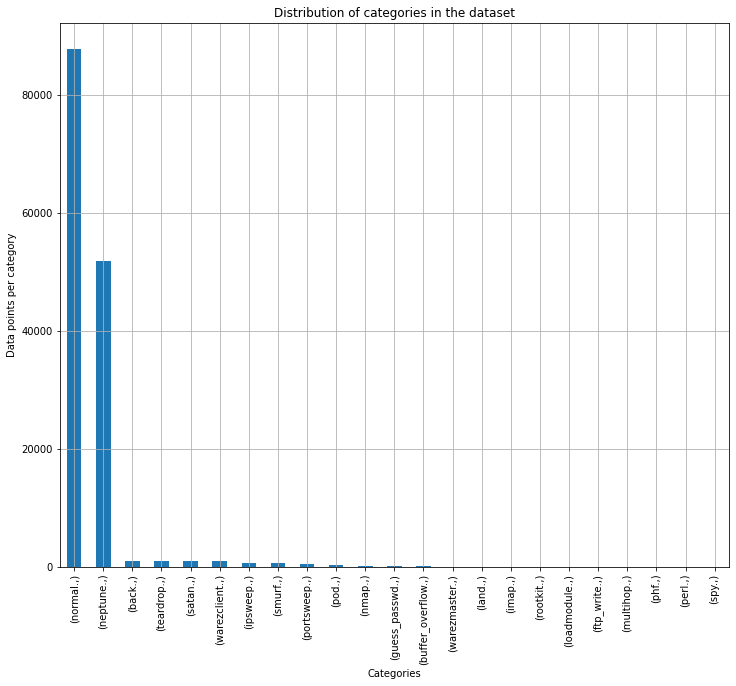

label           
normal.             87832
neptune.            51820
back.                 968
teardrop.             918
satan.                906
warezclient.          893
ipsweep.              651
smurf.                641
portsweep.            416
pod.                  206
nmap.                 158
guess_passwd.          53
buffer_overflow.       30
warezmaster.           20
land.                  19
imap.                  12
rootkit.               10
loadmodule.             9
ftp_write.              8
multihop.               7
phf.                    4
perl.                   3
spy.                    2
dtype: int64
No. of data points in label 1 : 87832 ---> 60.33 %
No. of data points in label 2 : 51820 ---> 35.594 %
No. of data points in label 3 : 968 ---> 0.665 %
No. of data points in label 4 : 918 ---> 0.631 %
No. of data points in label 5 : 906 ---> 0.622 %
No. of data points in label 6 : 893 ---> 0.613 %
No. of data points in label 7 : 651 ---> 0.447 %
No. of data points in la

In [ ]:
# Exploratory Data Analysis

import matplotlib.pyplot as plt
import numpy as np

# Observing how the classifications are distributed in class label
plt.figure(figsize = (12, 10))
dist_class = kdd_data.iloc[:, -1:].value_counts()
dist_class.plot(kind = "bar")
plt.xlabel("Categories")
plt.ylabel("Data points per category")
plt.title("Distribution of categories in the dataset")
plt.grid()
plt.show()

print(dist_class)

# ref: arg sort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order

sorted_dist_class = np.argsort(-dist_class.values)
for i in sorted_dist_class:
  dist_class_val = dist_class.values[i]
  dist_class_prcntg = (dist_class_val/kdd_data.shape[0]) * 100
  print("No. of data points in label", i + 1, ":", dist_class_val, "--->", np.round(dist_class_prcntg, 3), "%")


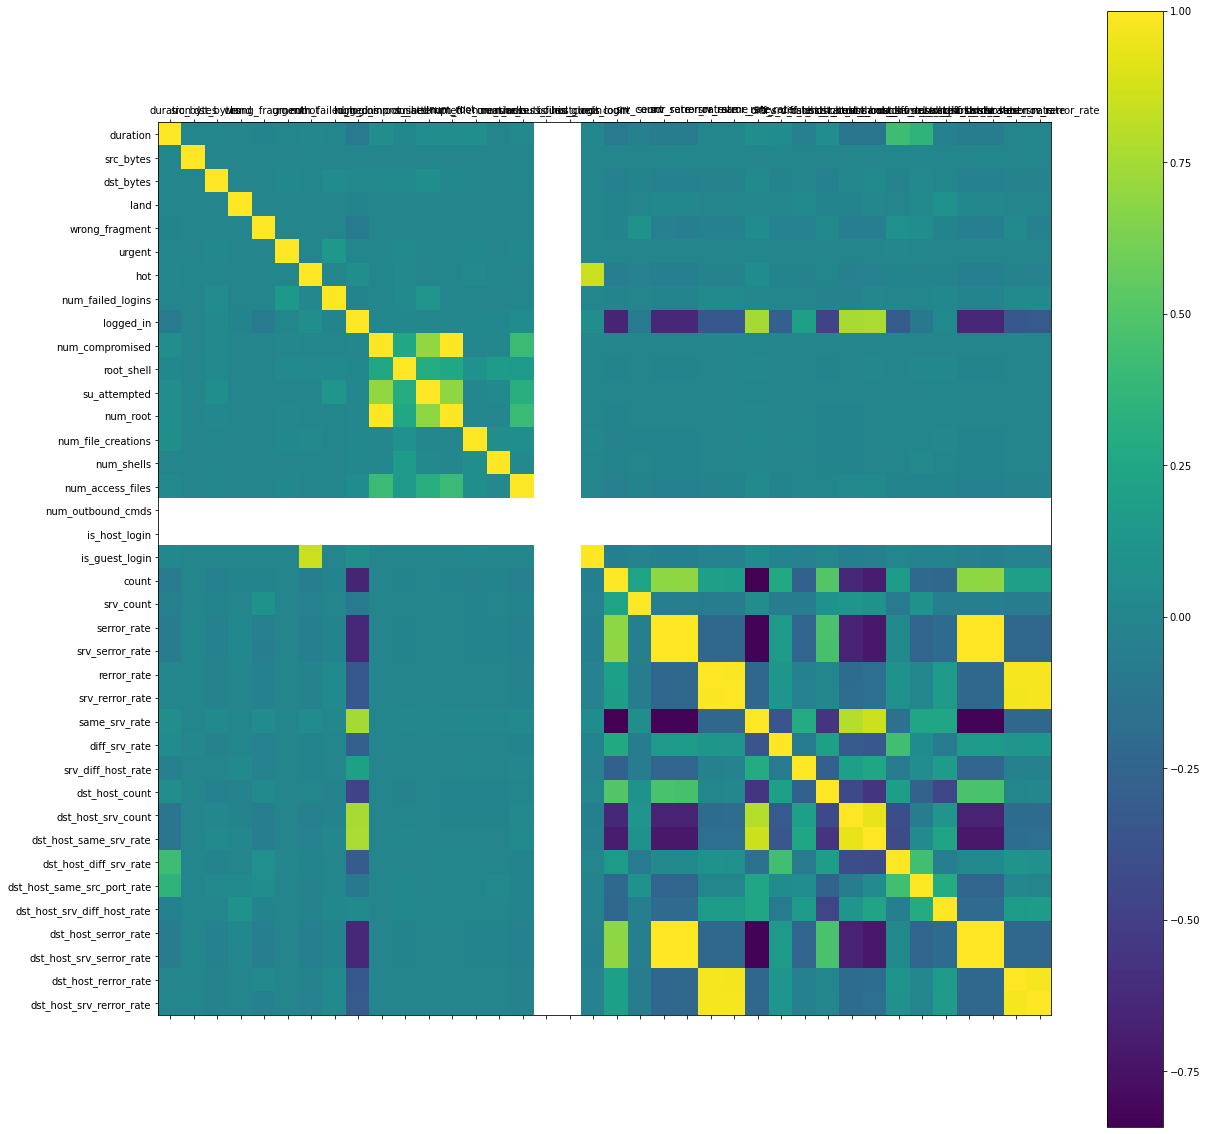

[['hot', 'is_guest_login'], ['num_compromised', 'num_root'], ['num_root', 'num_compromised'], ['is_guest_login', 'hot'], ['serror_rate', 'srv_serror_rate'], ['serror_rate', 'dst_host_serror_rate'], ['serror_rate', 'dst_host_srv_serror_rate'], ['srv_serror_rate', 'serror_rate'], ['srv_serror_rate', 'dst_host_serror_rate'], ['srv_serror_rate', 'dst_host_srv_serror_rate'], ['rerror_rate', 'srv_rerror_rate'], ['rerror_rate', 'dst_host_rerror_rate'], ['rerror_rate', 'dst_host_srv_rerror_rate'], ['srv_rerror_rate', 'rerror_rate'], ['srv_rerror_rate', 'dst_host_rerror_rate'], ['srv_rerror_rate', 'dst_host_srv_rerror_rate'], ['same_srv_rate', 'dst_host_same_srv_rate'], ['dst_host_srv_count', 'dst_host_same_srv_rate'], ['dst_host_same_srv_rate', 'same_srv_rate'], ['dst_host_same_srv_rate', 'dst_host_srv_count'], ['dst_host_serror_rate', 'serror_rate'], ['dst_host_serror_rate', 'srv_serror_rate'], ['dst_host_serror_rate', 'dst_host_srv_serror_rate'], ['dst_host_srv_serror_rate', 'serror_rate'], 

In [ ]:
# Performing correlation analysis
correlation = kdd_data.corr()
numcol = ["duration","src_bytes","dst_bytes", "land", "wrong_fragment", "urgent", "hot",
       "num_failed_logins", "logged_in", "num_compromised", "root_shell",
       "su_attempted", "num_root", "num_file_creations", "num_shells",
       "num_access_files", "num_outbound_cmds", "is_host_login",
       "is_guest_login", "count", "srv_count", "serror_rate",
       "srv_serror_rate", "rerror_rate", "srv_rerror_rate",
       "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate",
       "dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate",
       "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
       "dst_host_srv_diff_host_rate", "dst_host_serror_rate",
       "dst_host_srv_serror_rate", "dst_host_rerror_rate",
       "dst_host_srv_rerror_rate"]

plt.figure(figsize = (20, 20))
plt.matshow(correlation, fignum = 1)
plt.xticks(range(len(numcol)), numcol)
plt.yticks(range(len(numcol)), numcol)
plt.colorbar()
plt.show() 

def corrcol(corrcol):
  numcol = list(correlation.columns.values)
  b = []
  for i in range(len(numcol)):
    for j in range(len(numcol)):
      a = []
      if i != j:
        if correlation.iat[i, j] > 0.80:
          a.append(numcol[i])
          a.append(numcol[j])
          b.append(a)

  return b

corr = corrcol(correlation)
print(corr)

for i in range(len(corr)):
  for j in range(len(corr)):
    try:
      if corr[i][0] == corr[j][1] and corr[i][1] == corr[j][0]:
        print(corr.pop(j))
    except IndexError:
      pass


(145586, 2)


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Total time taken: 0:14:59.732513


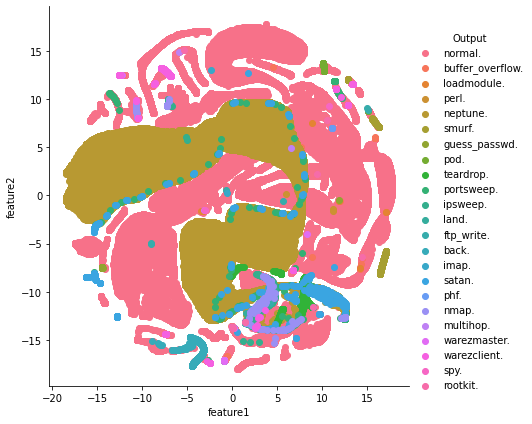

In [ ]:
# Creating TNSE plots for Bivariate Analysis
# Exluding categorical features

from datetime import datetime
import seaborn as sns
from sklearn.manifold import TSNE
import joblib

dataframe = kdd_data.drop(["label", "protocol_type", "service", "flag"], axis = 1)
Y = kdd_data["label"].values

def tnseFunction(kdd_data, label, no_comps, perplexity_value, n_iter_value):
  begin = datetime.now()
  tsne_BA = TSNE(n_components = no_comps, perplexity = perplexity_value, n_iter = n_iter_value)
  tsne_BA_data = tsne_BA.fit_transform(kdd_data)
  print(tsne_BA_data.shape)
  tsne_BA_data = np.vstack((tsne_BA_data.T, Y)).T
  tsne_data = pd.DataFrame(data = tsne_BA_data, columns = ["feature1", "feature2", "Output"])
  sns. FacetGrid(tsne_data, hue = "Output", size = 6).map(plt.scatter, "feature1", "feature2").add_legend()
  print("Total time taken:", datetime.now()-begin)
  plt.show()

tnseFunction(kdd_data = dataframe, label = Y, no_comps = 2, perplexity_value = 100, n_iter_value = 500)

(145586, 2)


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Total time taken: 0:21:44.138607


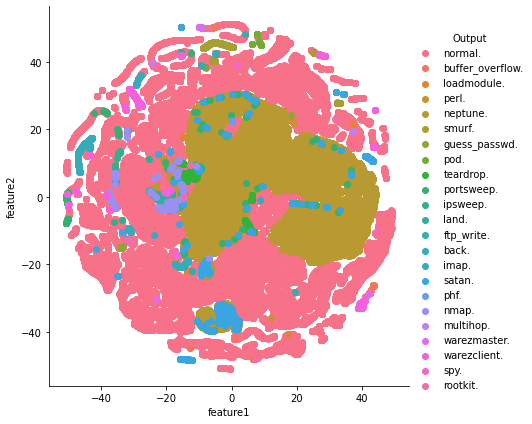

In [ ]:
tnseFunction(kdd_data = dataframe, label = Y, no_comps = 2, perplexity_value = 50, n_iter_value = 1000)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]), <a list of 23 Text major ticklabel objects>)

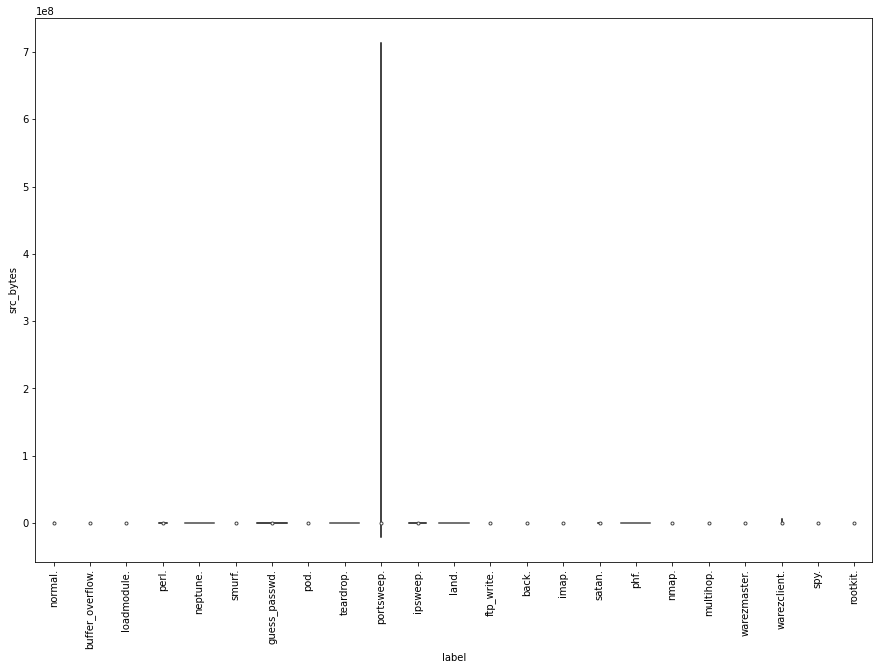

In [ ]:
plt.figure(figsize = (15, 10))
sns.violinplot(x = "label", y = "src_bytes", data = kdd_data)
plt.xticks(rotation = 90)

In [ ]:
# Data preprocessing for models

X = kdd_data
y = kdd_data['label'].values
kdd_data.drop(['label','hot','num_compromised','count','dst_host_same_src_port_rate','serror_rate','dst_host_serror_rate','dst_host_srv_serror_rate','rerror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','dst_host_srv_count','dst_host_same_srv_rate'], axis = 1, inplace = True)
kdd_data.head()

# Splitting dataset into training, testing data and cross-validation data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(X_cv.shape)
print(y_train.shape)
print(y_test.shape)
print(y_cv.shape)

(93174, 29)
(29118, 29)
(23294, 29)
(93174,)
(29118,)
(23294,)


In [ ]:
kdd_data.columns.values

array(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent',
       'num_failed_logins', 'logged_in', 'root_shell', 'su_attempted',
       'num_root', 'num_file_creations', 'num_shells', 'num_access_files',
       'num_outbound_cmds', 'is_host_login', 'is_guest_login',
       'srv_count', 'srv_serror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_diff_srv_rate', 'dst_host_srv_diff_host_rate'],
      dtype=object)

In [ ]:
# Encoding categorical features

from sklearn.feature_extraction.text import CountVectorizer

a = []
vector = CountVectorizer()
X_train_protocol = vector.fit_transform(X_train['protocol_type'].values)
X_cv_protocol = vector.transform(X_cv['protocol_type'].values)
X_test_protocol = vector.transform(X_test['protocol_type'].values)
print("After vectorizations:")
print(X_train_protocol.shape, y_train.shape)
print(X_cv_protocol.shape, y_cv.shape)
print(X_test_protocol.shape, y_test.shape)
print(vector.get_feature_names())
print('-' * 125)
a.extend(vector.get_feature_names())

After vectorizations:
(93174, 3) (93174,)
(23294, 3) (23294,)
(29118, 3) (29118,)
['icmp', 'tcp', 'udp']
-----------------------------------------------------------------------------------------------------------------------------


In [ ]:
vector = CountVectorizer()
X_train_service = vector.fit_transform(X_train['service'].values)
X_cv_service = vector.transform(X_cv['service'].values)
X_test_service = vector.transform(X_test['service'].values)
print("After vectorizations:")
print(X_train_service.shape, y_train.shape)
print(X_cv_service.shape, y_cv.shape)
print(X_test_service.shape, y_test.shape)
print(vector.get_feature_names())
print('-' * 125)
a.extend(vector.get_feature_names())

After vectorizations:
(93174, 66) (93174,)
(23294, 66) (23294,)
(29118, 66) (29118,)
['auth', 'bgp', 'courier', 'csnet_ns', 'ctf', 'daytime', 'discard', 'domain', 'domain_u', 'echo', 'eco_i', 'ecr_i', 'efs', 'exec', 'finger', 'ftp', 'ftp_data', 'gopher', 'hostnames', 'http', 'http_443', 'imap4', 'irc', 'iso_tsap', 'klogin', 'kshell', 'ldap', 'link', 'login', 'mtp', 'name', 'netbios_dgm', 'netbios_ns', 'netbios_ssn', 'netstat', 'nnsp', 'nntp', 'ntp_u', 'other', 'pm_dump', 'pop_2', 'pop_3', 'printer', 'private', 'red_i', 'remote_job', 'rje', 'shell', 'smtp', 'sql_net', 'ssh', 'sunrpc', 'supdup', 'systat', 'telnet', 'tftp_u', 'tim_i', 'time', 'urh_i', 'urp_i', 'uucp', 'uucp_path', 'vmnet', 'whois', 'x11', 'z39_50']
-----------------------------------------------------------------------------------------------------------------------------


In [ ]:
vector = CountVectorizer()
X_train_flag = vector.fit_transform(X_train['flag'].values)
X_cv_flag = vector.transform(X_cv['flag'].values)
X_test_flag = vector.transform(X_test['flag'].values)
print("After vectorizations:")
print(X_train_flag.shape, y_train.shape)
print(X_cv_flag.shape, y_cv.shape)
print(X_test_flag.shape, y_test.shape)
print(vector.get_feature_names())
print('-' * 125)
a.extend(vector.get_feature_names())

After vectorizations:
(93174, 11) (93174,)
(23294, 11) (23294,)
(29118, 11) (29118,)
['oth', 'rej', 'rsto', 'rstos0', 'rstr', 's0', 's1', 's2', 's3', 'sf', 'sh']
-----------------------------------------------------------------------------------------------------------------------------


In [ ]:
# Encoding numerical features
from sklearn.preprocessing import Normalizer

feature_names = ['duration','src_bytes','dst_bytes','land','wrong_fragment','urgent',
       'num_failed_logins', 'logged_in', 'root_shell', 'su_attempted',
       'num_root', 'num_file_creations', 'num_shells', 'num_access_files',
       'num_outbound_cmds', 'is_host_login', 'is_guest_login',
       'srv_count','srv_serror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate','srv_diff_host_rate', 'dst_host_count',
       'dst_host_diff_srv_rate', 'dst_host_srv_diff_host_rate']
scalar = Normalizer()
X_train_num_scalar = scalar.fit_transform(X_train[feature_names].values)
X_cv_num_scalar = scalar.transform(X_cv[feature_names].values)
X_test_num_scalar = scalar.transform(X_test[feature_names].values)
print("After vectorizations")
print(X_train_num_scalar.shape, y_train.shape)
print(X_cv_num_scalar.shape, y_cv.shape)
print(X_test_num_scalar.shape, y_test.shape)
print("-"*125)
a.extend(feature_names)

After vectorizations
(93174, 26) (93174,)
(23294, 26) (23294,)
(29118, 26) (29118,)
-----------------------------------------------------------------------------------------------------------------------------


In [ ]:
from scipy.sparse import hstack
X_tr = hstack((X_train_protocol,X_train_service,X_train_flag,X_train_num_scalar))
X_te = hstack((X_test_protocol,X_test_service,X_test_flag,X_test_num_scalar))
X_cv = hstack((X_cv_protocol,X_cv_service,X_cv_flag,X_cv_num_scalar))
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_te.shape, y_test.shape)
print(X_cv.shape, y_cv.shape)
print("-"*125)

len(a)

Final Data matrix
(93174, 106) (93174,)
(29118, 106) (29118,)
(23294, 106) (23294,)
-----------------------------------------------------------------------------------------------------------------------------


106

for alpha = 1e-05
Train Accuracy: 97.56%  CV Accuracy: 97.35%
--------------------------------------------------
for alpha = 0.0001
Train Accuracy: 97.56%  CV Accuracy: 97.35%
--------------------------------------------------
for alpha = 0.001
Train Accuracy: 97.56%  CV Accuracy: 97.35%
--------------------------------------------------
for alpha = 0.1
Train Accuracy: 97.53%  CV Accuracy: 97.32%
--------------------------------------------------
for alpha = 1
Train Accuracy: 97.42%  CV Accuracy: 97.26%
--------------------------------------------------
for alpha = 10
Train Accuracy: 97.27%  CV Accuracy: 97.1%
--------------------------------------------------
for alpha = 100
Train Accuracy: 96.14%  CV Accuracy: 95.92%
--------------------------------------------------
for alpha = 1000
Train Accuracy: 95.89%  CV Accuracy: 95.64%
--------------------------------------------------


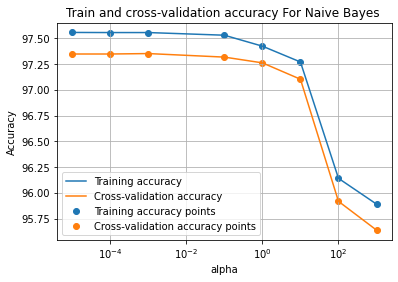

In [ ]:
# Machine Learning models
from sklearn.metrics import accuracy_score as acc_sc 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from scipy.stats import randint as random 
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB

# Multinomial Naive Bayes
train_acc = []
cv_acc = []
alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
for i in alpha:
    print("for alpha =", i)
    clf = MultinomialNB(alpha=i)
    clf.fit(X_tr, y_train)
    pred_y_train = clf.predict(X_tr)
    pred_y_cv = clf.predict(X_cv)
    train_acc.append(acc_sc(y_train,pred_y_train)*100)
    cv_acc.append(acc_sc(y_cv,pred_y_cv)*100)
    print("Train Accuracy: {}%  CV Accuracy: {}%".format(np.round(acc_sc(y_train,pred_y_train) * 100, 2), np.round(acc_sc(y_cv,pred_y_cv) * 100, 2)))
    print("-"*50)
plt.plot(alpha, train_acc, label='Training accuracy')
plt.plot(alpha, cv_acc, label='Cross-validation accuracy')
plt.scatter(alpha, train_acc, label='Training accuracy points')
plt.scatter(alpha, cv_acc, label='Cross-validation accuracy points')
plt.legend()
plt.xlabel("alpha")
plt.xscale("log")
plt.ylabel("Accuracy")
plt.title("Train and cross-validation accuracy For Naive Bayes ")
plt.grid()
plt.show()

In [ ]:
best_alpha = np.argmax(cv_acc)
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(X_tr,y_train)
predicted_y_tr = clf.predict(X_tr)
print('For values of best alpha = ', alpha[best_alpha], "The Train Accuracy is:",np.round(acc_sc(y_train, predicted_y_tr) * 100, 2))
predicted_y_cv = clf.predict(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation Accuracy is:",np.round(acc_sc(y_cv, predicted_y_cv) * 100, 2))
predicted_y_te = clf.predict(X_te)
print('For values of best alpha = ', alpha[best_alpha], "The test Accuracy is:",np.round(acc_sc(y_test, predicted_y_te) * 100, 2))

For values of best alpha =  0.001 The Train Accuracy is: 97.56
For values of best alpha =  0.001 The cross validation Accuracy is: 97.35
For values of best alpha =  0.001 The test Accuracy is: 97.59


Train confusion_matrix


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


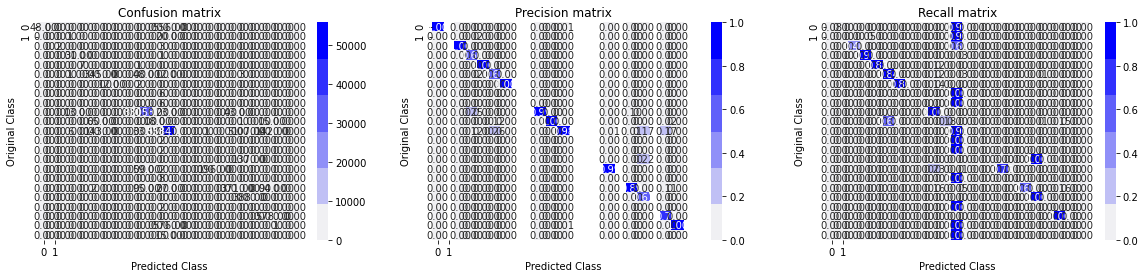

Test confusion_matrix


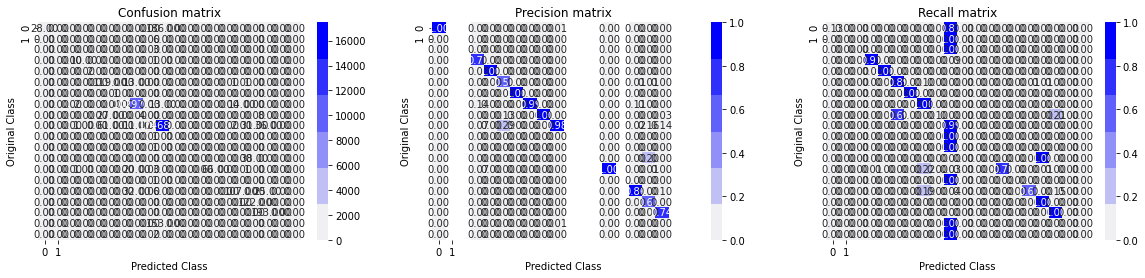

In [ ]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, pred_y):
    C = confusion_matrix(test_y, pred_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20, 4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".2f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".2f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".2f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

print('Train confusion_matrix')
plot_confusion_matrix(y_train,predicted_y_tr)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,predicted_y_te)


In [ ]:
# Finding the top 10 important class label 1 features
sorted_idx1 = np.argsort(clf.feature_log_prob_)[1][::-1][0:10]
top_pos=np.take(a, sorted_idx1)
print("Top 10 important class label 1 features are:",top_pos)

# Finding the top 10 important class label 0 features
sorted_idx2 = np.argsort( clf.feature_log_prob_ )[0][::-1][0:10]
top_neg=np.take(a,sorted_idx2)
print("Top 10 important class label 0 features are:",top_neg)

Top 10 important class label 1 features are: ['tcp' 'sf' 'dst_bytes' 'telnet' 'src_bytes' 'ftp_data' 'rsto' 'ftp'
 'duration' 'dst_host_count']
Top 10 important class label 0 features are: ['http' 'tcp' 'src_bytes' 'sf' 'dst_bytes' 'rstr' 's1' 'dst_host_count'
 's2' 'srv_count']


for c = 1e-05
Train Accuracy: 37.9%  CV Accuracy: 38.39%
--------------------------------------------------
for c = 0.0001
Train Accuracy: 37.93%  CV Accuracy: 38.41%
--------------------------------------------------
for c = 0.001
Train Accuracy: 34.02%  CV Accuracy: 34.32%
--------------------------------------------------
for c = 0.1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Train Accuracy: 77.18%  CV Accuracy: 77.32%
--------------------------------------------------
for c = 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Train Accuracy: 82.03%  CV Accuracy: 81.93%
--------------------------------------------------
for c = 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Train Accuracy: 85.02%  CV Accuracy: 84.92%
--------------------------------------------------
for c = 100


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Train Accuracy: 86.46%  CV Accuracy: 86.27%
--------------------------------------------------
for c = 1000


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Train Accuracy: 86.61%  CV Accuracy: 86.4%
--------------------------------------------------


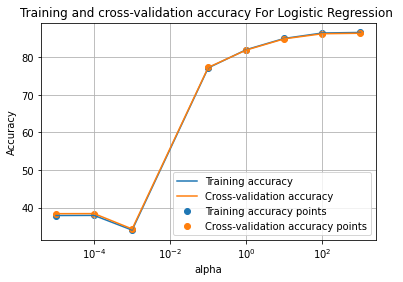

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
train_acc =[]
cv_acc = []
c = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
for i in c:
    print("for c =", i)
    clf = LogisticRegression(C=i,class_weight='balanced')
    clf.fit(X_tr, y_train)
    pred_y_train = clf.predict(X_tr)
    pred_y_cv = clf.predict(X_cv)
    train_acc.append(acc_sc(y_train,pred_y_train) * 100)
    cv_acc.append(acc_sc(y_cv,pred_y_cv)*100)
    print("Train Accuracy: {}%  CV Accuracy: {}%".format(np.round(acc_sc(y_train,pred_y_train) * 100, 2), np.round(acc_sc(y_cv,pred_y_cv) * 100, 2)))
    print("-"*50)
plt.plot(c, train_acc, label='Training accuracy')
plt.plot(c, cv_acc, label='Cross-validation accuracy')
plt.scatter(c, train_acc, label='Training accuracy points')
plt.scatter(c, cv_acc, label='Cross-validation accuracy points')
plt.legend()
plt.xlabel("alpha")
plt.xscale("log")
plt.ylabel("Accuracy")
plt.title("Training and cross-validation accuracy For Logistic Regression ")
plt.grid()
plt.show()

In [ ]:
best_c = np.argmax(cv_acc)
clf = LogisticRegression(C = c[best_c])
clf.fit(X_tr,y_train)
predicted_y_tr = clf.predict(X_tr)
print('For values of best alpha = ',c[best_c], "The Train Accuracy is:",np.round(acc_sc(y_train, predicted_y_tr) * 100, 2))
predicted_y_cv = clf.predict(X_cv)
print('For values of best alpha = ', c[best_c], "The cross validation Accuracy is:",np.round(acc_sc(y_cv, predicted_y_cv) * 100, 2))
predicted_y_te = clf.predict(X_te)
print('For values of best alpha = ', c[best_c], "The test Accuracy is:",np.round(acc_sc(y_test, predicted_y_te) * 100, 2))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


For values of best alpha =  1000 The Train Accuracy is: 99.06
For values of best alpha =  1000 The cross validation Accuracy is: 98.97
For values of best alpha =  1000 The test Accuracy is: 99.09


Train confusion_matrix


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


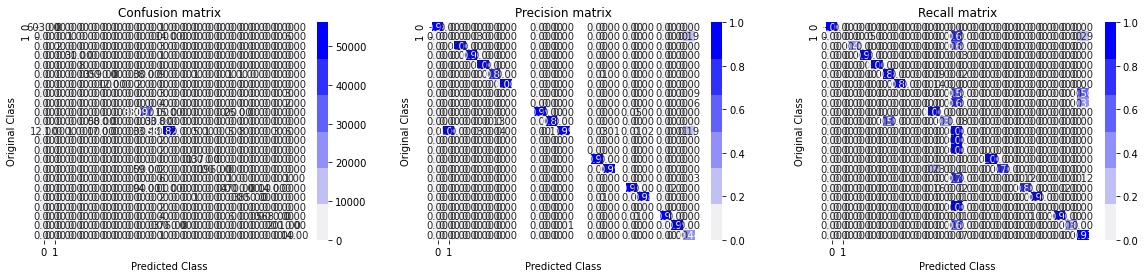

Test confusion_matrix


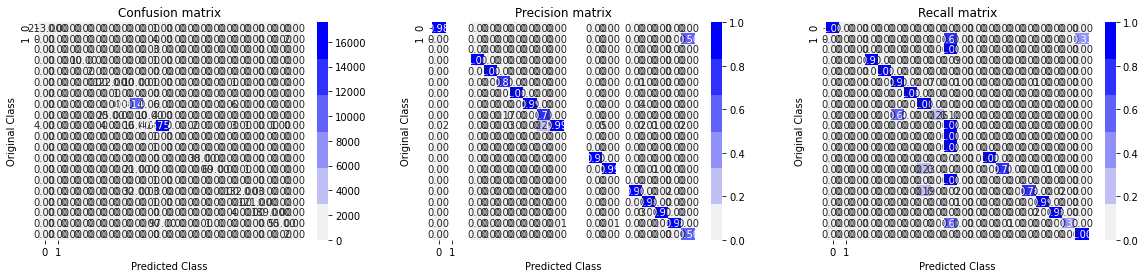

In [ ]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,predicted_y_tr)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,predicted_y_te)

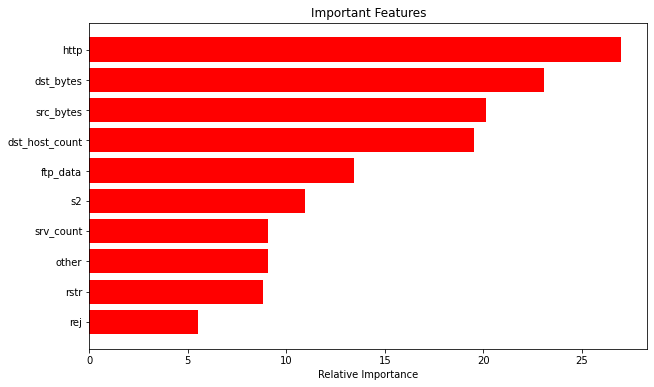

In [ ]:
#Finding the important features from the logistic regression model
feat = a
importances = abs(clf.coef_[0])
ind = (np.argsort(importances))[-10:]
plt.figure(figsize=(10,6))
plt.title('Important Features')
plt.barh(range(len(ind)), importances[ind], color='r', align='center')
plt.yticks(range(len(ind)), [feat[i] for i in ind])
plt.xlabel('Relative Importance')
plt.show()

for alpha = 0.0001
Train Accuracy: 95.78%  CV Accuracy: 95.76%
--------------------------------------------------
for alpha = 0.001
Train Accuracy: 95.28%  CV Accuracy: 95.09%
--------------------------------------------------
for alpha = 0.1
Train Accuracy: 96.12%  CV Accuracy: 95.9%
--------------------------------------------------
for alpha = 1
Train Accuracy: 93.58%  CV Accuracy: 93.25%
--------------------------------------------------
for alpha = 10
Train Accuracy: 95.81%  CV Accuracy: 95.53%
--------------------------------------------------
for alpha = 100
Train Accuracy: 95.05%  CV Accuracy: 94.74%
--------------------------------------------------
for alpha = 1000
Train Accuracy: 35.56%  CV Accuracy: 35.88%
--------------------------------------------------


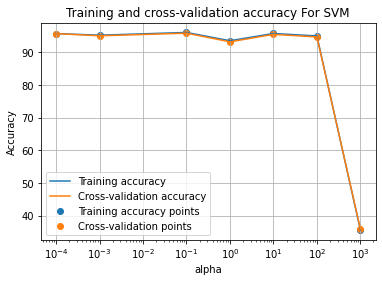

In [ ]:
# Support Vector Machines
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
train_acc = []
cv_acc = []
alpha = [0.0001, 0.001, 0.1, 1, 10, 100,1000]
for i in alpha:
    print("for alpha =", i)
    clf =SGDClassifier(alpha=i, loss='hinge', class_weight='balanced')
    clf.fit(X_tr, y_train)
    pred_y_train = clf.predict(X_tr)
    pred_y_cv = clf.predict(X_cv)
    train_acc.append(acc_sc(y_train, pred_y_train) * 100)
    cv_acc.append(acc_sc(y_cv, pred_y_cv) * 100)
    print("Train Accuracy: {}%  CV Accuracy: {}%".format(np.round(acc_sc(y_train,pred_y_train) * 100, 2),np.round(acc_sc(y_cv, pred_y_cv) * 100, 2)))
    print("-"*50)
plt.plot(alpha, train_acc, label='Training accuracy')
plt.plot(alpha, cv_acc, label='Cross-validation accuracy')
plt.scatter(alpha, train_acc, label='Training accuracy points')
plt.scatter(alpha, cv_acc, label='Cross-validation points')
plt.legend()
plt.xlabel("alpha")
plt.xscale("log")
plt.ylabel("Accuracy")
plt.title("Training and cross-validation accuracy For SVM")
plt.grid()
plt.show()

In [ ]:
best_alpha = np.argmax(cv_acc)
clf =SGDClassifier(alpha = alpha[best_alpha], loss='hinge', class_weight='balanced')
clf.fit(X_tr,y_train)
predicted_y_tr = clf.predict(X_tr)
print('For values of best alpha = ', alpha[best_alpha], "The Train Accuracy is:",np.round(acc_sc(y_train, predicted_y_tr) * 100, 2))
predicted_y_cv = clf.predict(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation Accuracy is:",np.round(acc_sc(y_cv, predicted_y_cv) * 100, 2))
predicted_y_te = clf.predict(X_te)
print('For values of best alpha = ', alpha[best_alpha], "The test Accuracy is:",np.round(acc_sc(y_test, predicted_y_te) * 100, 2))

For values of best alpha =  0.1 The Train Accuracy is: 96.13
For values of best alpha =  0.1 The cross validation Accuracy is: 95.9
For values of best alpha =  0.1 The test Accuracy is: 96.07


Train confusion_matrix


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


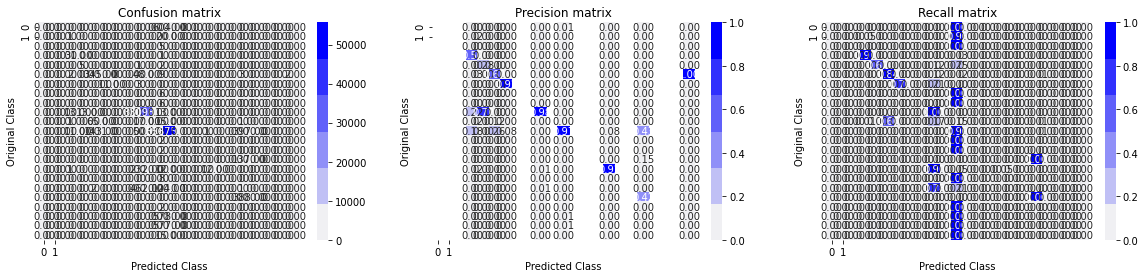

Test confusion_matrix


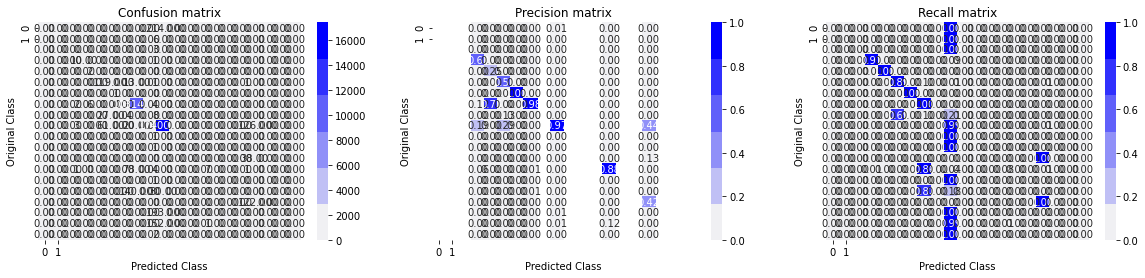

In [ ]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,predicted_y_tr)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,predicted_y_te)

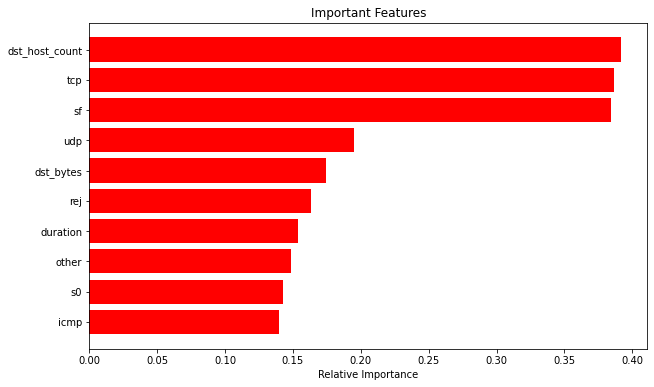

In [ ]:
#Finding the important features from the SVR model
feat = a
importances = abs(clf.coef_[0])
ind = (np.argsort(importances))[-10:]
plt.figure(figsize=(10,6))
plt.title('Important Features')
plt.barh(range(len(ind)), importances[ind], color='r', align='center')
plt.yticks(range(len(ind)), [feat[i] for i in ind])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
# Random Forest Classifier
start=datetime.now()
param_dist = {"n_estimators": random(105,125),
              "max_depth": random(10,15),
              "min_samples_split": random(110,190),
              "min_samples_leaf": random(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1,class_weight='balanced')

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='accuracy',random_state=25)

In [ ]:
rf_random.fit(X_tr,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
#print('mean train scores',rf_random.cv_results_['mean_train_score'])
print('Total time taken is {}'.format(datetime.now()-start))

print(rf_random.best_estimator_)

clf=RandomForestClassifier(bootstrap=True, class_weight='balanced', criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

clf.fit(X_tr,y_train)
pred_y_train = clf.predict(X_tr)
pred_y_test = clf.predict(X_te)

print('Train accuracy is {}%'.format(acc_sc(y_train, pred_y_train) * 100))
print('Test accuracy is {}%'.format(acc_sc(y_test, pred_y_test) * 100))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


mean test scores [0.97134397 0.96832811 0.96283303 0.96760901 0.97457447]
Total time taken is 0:03:59.410324
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=14, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=28, min_samples_split=111,
                       min_weight_fraction_leaf=0.0, n_estimators=121,
                       n_jobs=-1, oob_score=False, random_state=25, verbose=0,
                       warm_start=False)
Train accuracy is 97.33509348101401%
Test accuracy is 97.29377017652311%


Train confusion_matrix


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


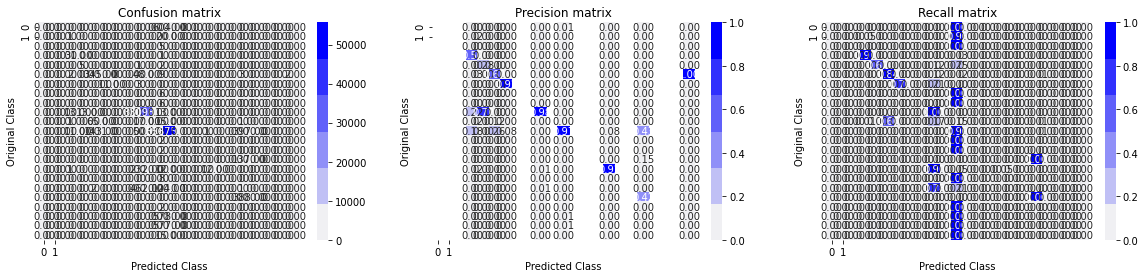

Test confusion_matrix


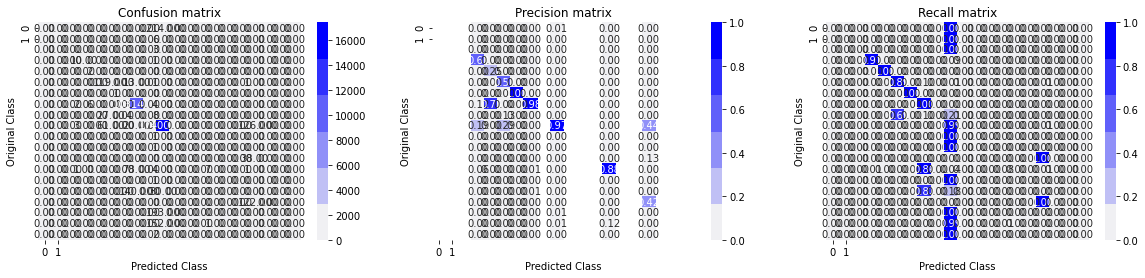

In [ ]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,predicted_y_tr)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,predicted_y_te)

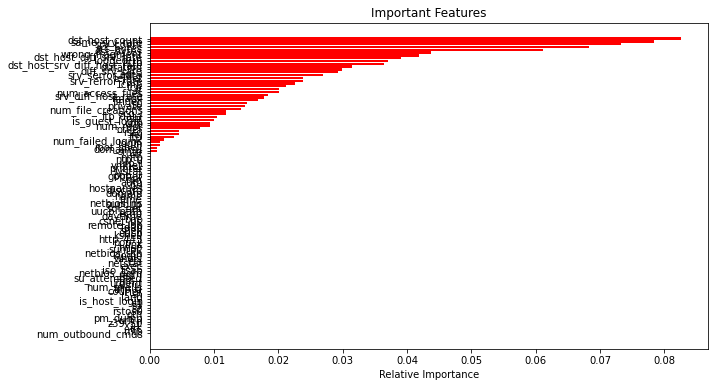

In [ ]:
#Finding the important features from the Random Forest model
feat = a
importances = clf.feature_importances_
ind = (np.argsort(importances))
plt.figure(figsize=(10,6))
plt.title('Important Features')
plt.barh(range(len(ind)), importances[ind], color='r', align='center')
plt.yticks(range(len(ind)), [feat[i] for i in ind])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
# Visualizing Decision Tree
from sklearn import tree
GF = tree.DecisionTreeClassifier(max_depth=3)
e = pd.DataFrame(a)
e = e.T
e.columns = a
GF = GF.fit(X_tr, y_train)
e.head()

,icmp,tcp,udp,auth,bgp,courier,csnet_ns,ctf,daytime,discard,domain,domain_u,echo,eco_i,ecr_i,efs,exec,finger,ftp,ftp_data,gopher,hostnames,http,http_443,imap4,irc,iso_tsap,klogin,kshell,ldap,link,login,mtp,name,netbios_dgm,netbios_ns,netbios_ssn,netstat,nnsp,nntp,...,whois,x11,z39_50,oth,rej,rsto,rstos0,rstr,s0,s1,s2,s3,sf,sh,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,num_failed_logins,logged_in,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,srv_count,srv_serror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_diff_srv_rate,dst_host_srv_diff_host_rate
0,icmp,tcp,udp,auth,bgp,courier,csnet_ns,ctf,daytime,discard,domain,domain_u,echo,eco_i,ecr_i,efs,exec,finger,ftp,ftp_data,gopher,hostnames,http,http_443,imap4,irc,iso_tsap,klogin,kshell,ldap,link,login,mtp,name,netbios_dgm,netbios_ns,netbios_ssn,netstat,nnsp,nntp,...,whois,x11,z39_50,oth,rej,rsto,rstos0,rstr,s0,s1,s2,s3,sf,sh,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,num_failed_logins,logged_in,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,srv_count,srv_serror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_diff_srv_rate,dst_host_srv_diff_host_rate


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


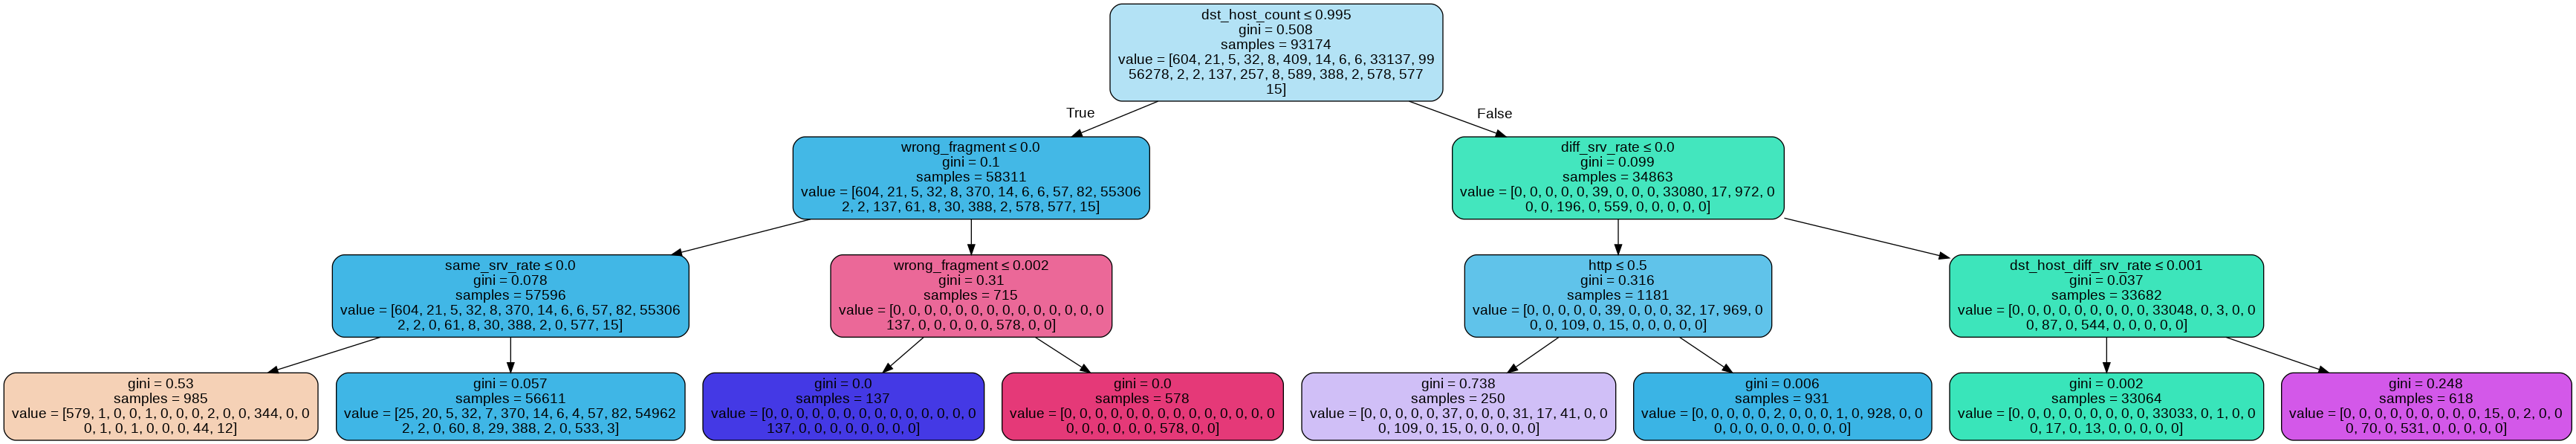

In [ ]:
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
tree.export_graphviz(GF,out_file=dot_data,feature_names=e.columns,filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.set_size(500,100)
Image(graph.create_png())

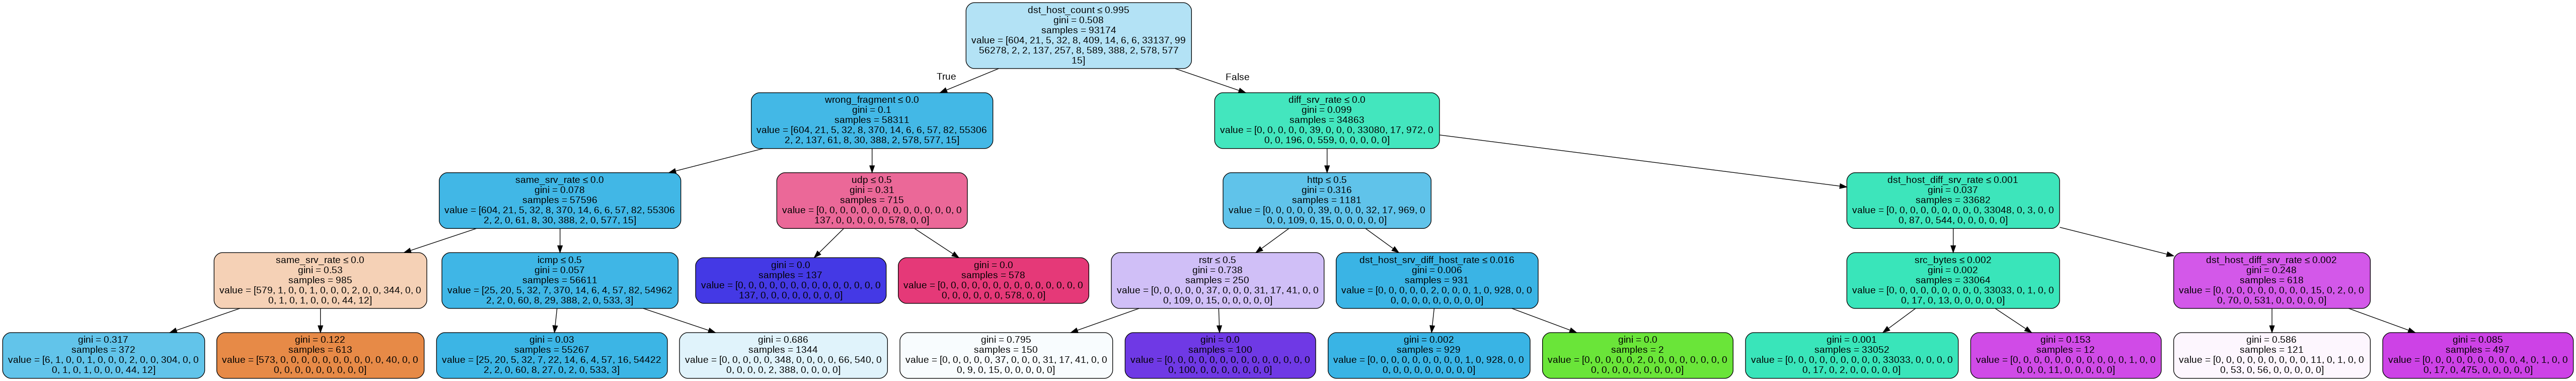

In [ ]:
from sklearn import tree
GF = tree.DecisionTreeClassifier(max_depth=4)
GF = GF.fit(X_tr, y_train)

from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
tree.export_graphviz(GF,out_file=dot_data,feature_names=e.columns,filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

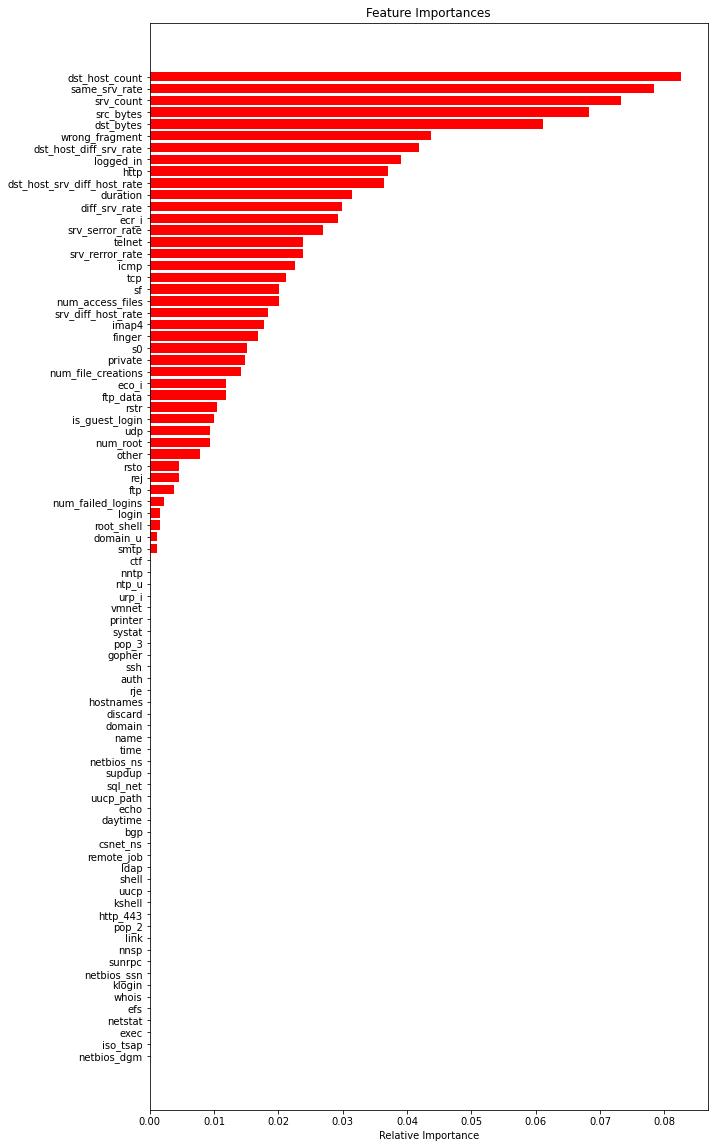

Total number of features after removing 0 feature importance features are:  84


In [ ]:
# Top features excluding 0 feature importances
feat = a
importances = clf.feature_importances_
ind = (np.argsort(importances))
ind = [i for i in ind if importances[i] != 0]
plt.figure(figsize=(10,20))
plt.title('Feature Importances')
plt.barh(range(len(ind)), importances[ind], color='r', align='center')
plt.yticks(range(len(ind)), [feat[i] for i in ind])
plt.xlabel('Relative Importance')
plt.show()
print("Total number of features after removing 0 feature importance features are: ",len(ind))

In [ ]:
# Random Forest with Important Features

X_tr1=X_tr.tocsr()[:,ind].tocoo()
X_cv1=X_cv.tocsr()[:,ind].tocoo()
X_te1=X_te.tocsr()[:,ind].tocoo()

start=datetime.now()
param_dist = {"n_estimators": random(105,125),
              "max_depth": random(10,15),
              "min_samples_split": random(110,190),
              "min_samples_leaf": random(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1,class_weight='balanced')

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='accuracy',random_state=25)

rf_random.fit(X_tr1,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
#print('mean train scores',rf_random.cv_results_['mean_train_score'])
print('Total time taken is {}'.format(datetime.now()-start))



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


mean test scores [0.97527203 0.97196643 0.96588103 0.9727928  0.9799192 ]
Total time taken is 0:04:20.160763


In [ ]:
clf=RandomForestClassifier(bootstrap=True, class_weight='balanced', criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

clf.fit(X_tr1,y_train)
pred_y_train = clf.predict(X_tr1)
pred_y_test = clf.predict(X_te1)

print('Train Accuracy', acc_sc(y_train, pred_y_train) * 100)
print('Test Accuracy', acc_sc(y_test, pred_y_test) * 100)

Train Accuracy 98.18404275870951
Test Accuracy 98.12487121368227


Train confusion_matrix


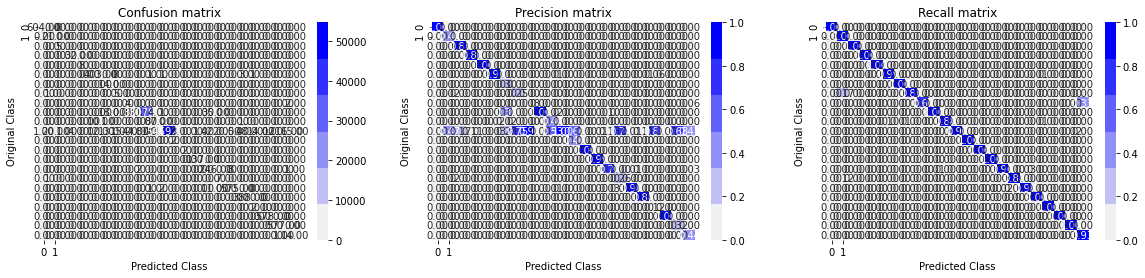

Test confusion_matrix


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


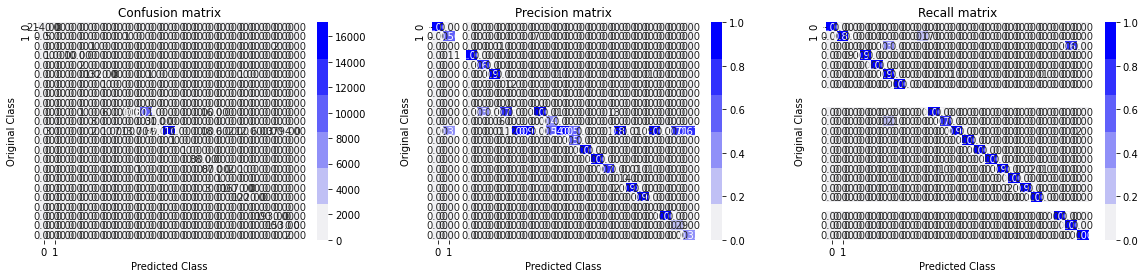

In [ ]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,pred_y_train)
print('Test confusion_matrix')
plot_confusion_matrix(y_test, pred_y_test)

In [ ]:
# XGBoost Classifier
from xgboost import XGBClassifier
n_est = [100,200,300,400,500]
maxdepth = [2,4,6,8,10]
params = {"n_estimators":n_est,"max_depth":maxdepth}
xgb = XGBClassifier(class_weight='balanced')
rsm = RandomizedSearchCV(xgb, params, cv=5, scoring='accuracy',n_jobs=-1)
rsm.fit(X_tr,y_train)
print("Best parameter obtained from RandomSearch CV: \n", rsm.best_params_)
print("Best Score : ", rsm.best_score_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Best parameter obtained from RandomSearch CV: 
 {'n_estimators': 300, 'max_depth': 10}
Best Score :  0.9989267357628236


In [ ]:
clf_xgb = XGBClassifier(n_estimators=100, max_depth= 8, class_weight='balanced')
clf_xgb.fit(X_tr,y_train)
pred_y_train = clf_xgb.predict(X_tr)
pred_y_test = clf_xgb.predict(X_te)
print('Train Accuracy', acc_sc(y_train, pred_y_train) * 100)
print('Test Accuracy', acc_sc(y_test, pred_y_test) * 100)

Train Accuracy 99.9989267392191
Test Accuracy 99.9278796620647


Train confusion_matrix


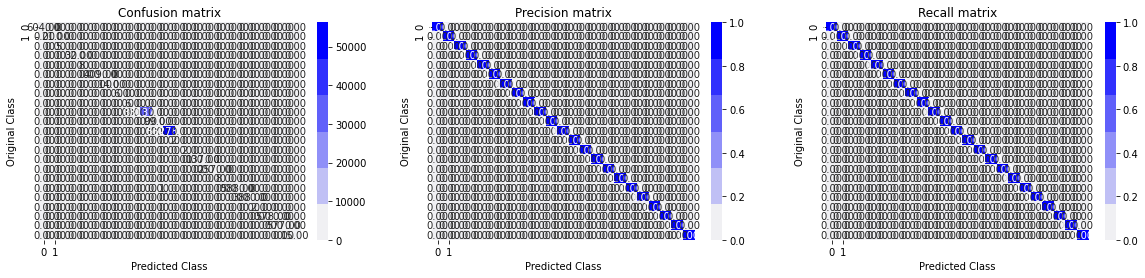

Test confusion_matrix


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


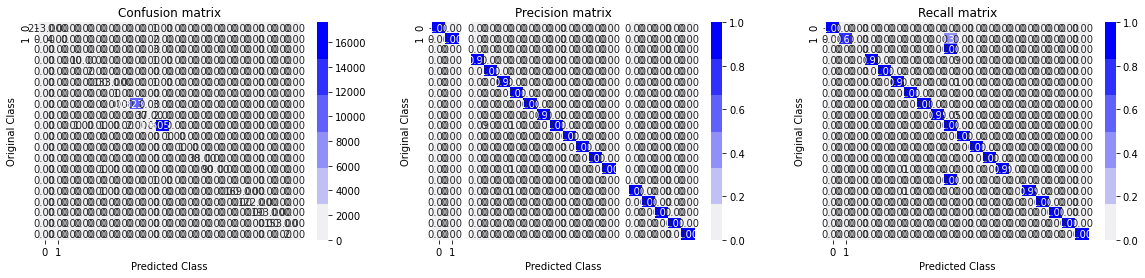

In [ ]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train, pred_y_train)
print('Test confusion_matrix')
plot_confusion_matrix(y_test, pred_y_test)

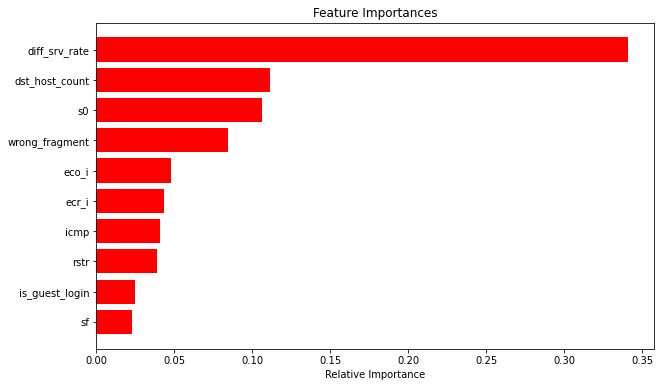

In [ ]:
# Top 10 features using XgBoost

feat = a
importances = clf_xgb.feature_importances_
ind = (np.argsort(importances))[-10:]
plt.figure(figsize=(10,6))
plt.title('Feature Importances')
plt.barh(range(len(ind)), importances[ind], color='r', align='center')
plt.yticks(range(len(ind)), [feat[i] for i in ind])
plt.xlabel('Relative Importance')
plt.show()